In [110]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [111]:
def addSphere (mat3d, bulk_size, sph_pos, sph_r, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                pos_x = (x+0.5-Nbulk[0]/2)*dbulk[0]
                pos_y = (y+0.5-Nbulk[1]/2)*dbulk[1]
                pos_z = (z)*dbulk[2]
                #print(pos_z)
                if (((pos_x - sph_pos[0])**2  + (pos_y - sph_pos[1])**2 + (pos_z - sph_pos[2])**2) < sph_r**2):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [112]:
def addXYCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_z, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                pos_x = (x+0.5-Nbulk[0]/2)*dbulk[0]
                pos_y = (y+0.5-Nbulk[1]/2)*dbulk[1]
                pos_z = (z)*dbulk[2]
                #print(pos_z)
                if ((((pos_x - cyl_pos[0])**2  + (pos_y - cyl_pos[1])**2) < cyl_r**2) and abs(pos_z - cyl_pos[2]) < cyl_z):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [113]:
def addXZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_y, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                pos_x = (x+0.5-Nbulk[0]/2)*dbulk[0]
                pos_y = (y+0.5-Nbulk[1]/2)*dbulk[1]
                pos_z = (z)*dbulk[2]
                #print(pos_z)
                if ((((pos_x - cyl_pos[0])**2  + (pos_z - cyl_pos[2])**2) < cyl_r**2) and abs(pos_y - cyl_pos[1]) < cyl_y):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [113]:
def addYZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_x, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                pos_x = (x+0.5-Nbulk[0]/2)*dbulk[0]
                pos_y = (y+0.5-Nbulk[1]/2)*dbulk[1]
                pos_z = (z)*dbulk[2]
                #print(pos_z)
                if ((((pos_y - cyl_pos[1])**2  + (pos_z - cyl_pos[2])**2) < cyl_r**2) and abs(pos_x - cyl_pos[0]) < cyl_x):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [114]:
grid_size = 5
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size

bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int) 
bulk3d.shape
bulk3d_size = [4*thickness, 4*thickness, thickness]

112 250000


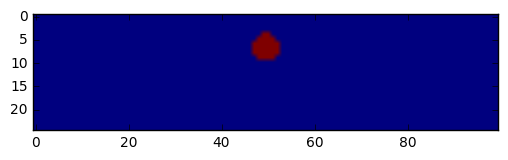

In [115]:
sphere_pos = (-1.9, 0, 1.35)
addSphere(bulk3d, bulk3d_size, sphere_pos, 0.595, 2)

slice_z = sphere_pos[2] * grid_size
slice_x = sphere_pos[0] * grid_size + 2*thickness
plt.imshow(bulk3d[40,:,:].T,vmin=1,vmax=2)
#cbar = plt.colorbar()

1040 250000


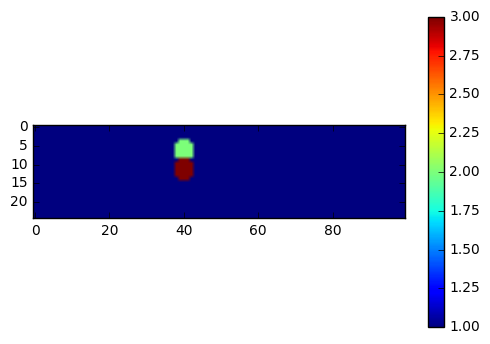

In [118]:
cyl_pos = (-1.9, 0, 2.35)
addXZCyl(bulk3d, bulk3d_size, cyl_pos, 0.595, 4, 3)

slice_z = sphere_pos[2] * grid_size
slice_x = sphere_pos[0] * grid_size + 2*thickness
plt.imshow(bulk3d[:,50,:].T,vmin=1)
cbar = plt.colorbar()

In [ ]:
filename = "3Dbulk-inclusion2-gs5-b"
filename_back = "3Dbulk-fondo-gs5-b"

In [50]:
bulk_flat_back = np.full((size_lat,size_lat,size_depth),1,dtype=int).reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat_back.shape)
with open(filename_back,"wb") as f:
                savetxt(f, bulk_flat_back, fmt='%i', delimiter=" ")

(1, 250000)


In [51]:
bulk_flat = bulk3d.T.reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat.shape)
with open(filename,"wb") as f:
                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

(1, 250000)
